In [19]:
import pandas as pd
import numpy as np

In [20]:
# Open data to train the model
train_data = pd.read_csv('covid_early_stage_symptoms.csv')
#train_data.head()

In [21]:
# Open test data
test_data = pd.read_csv("test_data.csv")
#test_data.head()


In [22]:
travel = train_data.loc[train_data.travel_history == 1]["SARS-CoV-2 Positive"]

rate_travel = sum(travel)/len(travel)
print("% of people who travel that are positive: ", rate_travel)

fever = train_data.loc[train_data.fever == 1]["SARS-CoV-2 Positive"]

rate_fever = sum(fever)/len(fever)
print("% of people who have fever that are positive: ", rate_fever)

lung = train_data.loc[train_data.lung_infection ==
                      1]["SARS-CoV-2 Positive"]

rate_lung = sum(lung)/len(lung)
print("% of people who have lung infection that are positive: ", rate_lung)

pneumonia = train_data.loc[train_data.pneumonia ==
                           1]["SARS-CoV-2 Positive"]

rate_pneumonia = sum(pneumonia)/len(pneumonia)
print("% of people who have pneumonia that are positive: ", rate_pneumonia)

pneumonia = train_data.loc[train_data.pneumonia ==
                           1]["SARS-CoV-2 Positive"]

rate_pneumonia = sum(pneumonia)/len(pneumonia)
print("% of people who have pneumonia that are positive: ", rate_pneumonia)


% of people who travel that are positive:  0.13706563706563707
% of people who have fever that are positive:  0.4675547915771379
% of people who have lung infection that are positive:  0.9108910891089109
% of people who have pneumonia that are positive:  1.0
% of people who have pneumonia that are positive:  1.0


Lung infection and pneumonia are the two comorbities with the higher relation

In [23]:
# Change 'female'and 'male' to 1 and 0
train_data.loc[train_data['gender'] == 'male', 'gender'] = 0
train_data.loc[train_data['gender'] == 'female', 'gender'] = 1
#train_data.head()

In [24]:
# Change 'female'and 'male' to 1 and 0
test_data.loc[test_data['gender'] == 'male', 'gender'] = 0
test_data.loc[test_data['gender'] == 'female', 'gender'] = 1
#test_data.head()


In [25]:
from sklearn.ensemble import RandomForestClassifier
# Create target object
y = train_data['SARS-CoV-2 Positive']
# Create X 
features = ['gender', 'age_year', 'fever', 'pneumonia', 'lung_infection', 'travel_history', 'cough', 'runny_nose', 'muscle_soreness']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])


In [26]:
# n_estimators is the number of trees, the default is 100
# max_depth refers to the maximun depth of the tree
# random_state controls the randomness of the bootstrapping of the sampleswhen building the trees
model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


In [28]:
output = pd.DataFrame({'gender': test_data.gender, 'age': test_data.age_year, 'fever': test_data.fever, 'pneumonia': test_data.pneumonia,
                    'lung infection': test_data.lung_infection, 'travel history': test_data.travel_history, 'cough': test_data.cough,
                    'runny nose': test_data.runny_nose, 'muscle soreness': test_data.muscle_soreness, 'Covid positive': predictions})


In [29]:
output.loc[output['gender'] == 0, 'gender'] = 'male'
output.loc[output['gender'] == 1, 'gender'] = 'female'
#output.head()


In [30]:
output.to_csv('result.csv', index = False)

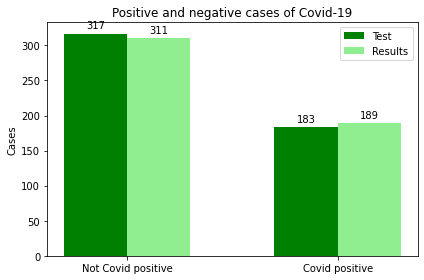

In [33]:
import matplotlib.pyplot as plt

labels = ['Not Covid positive', 'Covid positive']
test_count = [test_data.loc[test_data['SARS-CoV-2 Positive']
                            == 0, 'SARS-CoV-2 Positive'].count(), test_data.loc[test_data['SARS-CoV-2 Positive'] == 1, 'SARS-CoV-2 Positive'].count()]
output_count = [output.loc[output['Covid positive']
                           == 0, 'Covid positive'].count(), output.loc[output['Covid positive'] == 1, 'Covid positive'].count()]

x = np.arange(len(labels))
width = 0.30

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, test_count, width, label='Test', color = 'Green')
rects2 = ax.bar(x + width/2, output_count, width, label='Results', color = 'lightgreen')

ax.set_ylabel('Cases')
ax.set_title('Positive and negative cases of Covid-19')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
